In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import seaborn as sns
import plotly.express as px
import sys
from ipywidgets import interact, interactive, fixed

import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_absolute_error as MAE



In [3]:
df_train =pd.read_csv('public_data/train.csv',parse_dates=['date'] )
df_test=pd.read_csv('public_data/test.csv', parse_dates = ['date'])


# 1 - Data cleaning

In [13]:
df_train.date.unique().shape,22202-27

((22127,), 22175)

In [10]:
df_train.head()

,date,Station,Available,Charging,Passive,Other,tod,dow,trend,Latitude,Longitude,Postcode,area
0,2020-07-03,FR*V75*EBELI*1*1,3,0,0,0,0,6,27,48.855667,2.354089,75004,south
1,2020-07-03,FR*V75*EBELI*10*1,2,1,0,0,0,6,27,48.864240,2.397724,75020,east
2,2020-07-03,FR*V75*EBELI*11*1,2,1,0,0,0,6,27,48.861016,2.283080,75016,west
3,2020-07-03,FR*V75*EBELI*12*1,3,0,0,0,0,6,27,48.824388,2.336857,75014,south
4,2020-07-03,FR*V75*EBELI*13*1,3,0,0,0,0,6,27,48.882640,2.335728,75009,north


In [4]:
df_train.tail()


,date,Station,Available,Charging,Passive,Other,tod,dow,trend,Latitude,Longitude,Postcode,area
1851078,2021-02-18 23:45:00,FR*V75*EBELI*95*1,0,0,0,3,95,5,22202,48.86851,2.295469,75016,west
1851079,2021-02-18 23:45:00,FR*V75*EBELI*96*1,2,1,0,0,95,5,22202,48.83550,2.349650,75013,south
1851080,2021-02-18 23:45:00,FR*V75*EBELI*97*1,1,1,1,0,95,5,22202,48.83995,2.397822,75012,east
1851081,2021-02-18 23:45:00,FR*V75*EBELI*98*1,2,0,1,0,95,5,22202,48.84998,2.361920,75004,south
1851082,2021-02-18 23:45:00,FR*V75*EBELI*99*1,3,0,0,0,95,5,22202,48.87780,2.391820,75019,east


In [5]:
display(df_train[df_train.Postcode == 75003])

,date,Station,Available,Charging,Passive,Other,tod,dow,trend,Latitude,Longitude,Postcode,area
20,2020-07-03 00:00:00,FR*V75*EBELI*28*1,3,0,0,0,0,6,27,48.864719,2.359043,75003,north
78,2020-07-03 00:00:00,FR*V75*EBELI*87*1,3,0,0,0,0,6,27,48.865097,2.365540,75003,north
111,2020-07-03 00:15:00,FR*V75*EBELI*28*1,3,0,0,0,1,6,28,48.864719,2.359043,75003,north
169,2020-07-03 00:15:00,FR*V75*EBELI*87*1,3,0,0,0,1,6,28,48.865097,2.365540,75003,north
202,2020-07-03 00:30:00,FR*V75*EBELI*28*1,3,0,0,0,2,6,29,48.864719,2.359043,75003,north
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850888,2021-02-18 23:15:00,FR*V75*EBELI*87*1,3,0,0,0,93,5,22200,48.865100,2.365540,75003,north
1850921,2021-02-18 23:30:00,FR*V75*EBELI*28*1,3,0,0,0,94,5,22201,48.864720,2.359043,75003,north
1850979,2021-02-18 23:30:00,FR*V75*EBELI*87*1,3,0,0,0,94,5,22201,48.865100,2.365540,75003,north
1851012,2021-02-18 23:45:00,FR*V75*EBELI*28*1,3,0,0,0,95,5,22202,48.864720,2.359043,75003,north


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851083 entries, 0 to 1851082
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----         
 0   date       datetime64[ns]
 1   Station    object        
 2   Available  int64         
 3   Charging   int64         
 4   Passive    int64         
 5   Other      int64         
 6   tod        int64         
 7   dow        int64         
 8   trend      int64         
 9   Latitude   float64       
 10  Longitude  float64       
 11  Postcode   int64         
 12  area       object        
dtypes: datetime64[ns](1), float64(2), int64(8), object(2)
memory usage: 183.6+ MB


In [7]:
df_train.dtypes

date         datetime64[ns]
Station              object
Available             int64
Charging              int64
Passive               int64
Other                 int64
tod                   int64
dow                   int64
trend                 int64
Latitude            float64
Longitude           float64
Postcode              int64
area                 object
dtype: object

In [7]:
# Check number of duplicates

df_train.duplicated().sum()


0

In [8]:
df_train.nunique().sort_values(ascending=True)


Available        4
Charging         4
Passive          4
Other            4
area             4
dow              7
Postcode        21
Station         91
tod             96
Longitude      100
Latitude       166
date         22127
trend        22127
dtype: int64

In [8]:
df_train[:5000]

,date,Station,Available,Charging,Passive,Other,tod,dow,trend,Latitude,Longitude,Postcode,area
0,2020-07-03 00:00:00,FR*V75*EBELI*1*1,3,0,0,0,0,6,27,48.855667,2.354089,75004,south
1,2020-07-03 00:00:00,FR*V75*EBELI*10*1,2,1,0,0,0,6,27,48.864240,2.397724,75020,east
2,2020-07-03 00:00:00,FR*V75*EBELI*11*1,2,1,0,0,0,6,27,48.861016,2.283080,75016,west
3,2020-07-03 00:00:00,FR*V75*EBELI*12*1,3,0,0,0,0,6,27,48.824388,2.336857,75014,south
4,2020-07-03 00:00:00,FR*V75*EBELI*13*1,3,0,0,0,0,6,27,48.882640,2.335728,75009,north
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020-07-03 13:30:00,FR*V75*EBELI*9*1,2,0,1,0,54,6,81,48.878965,2.293606,75017,north
4996,2020-07-03 13:30:00,FR*V75*EBELI*91*1,2,0,1,0,54,6,81,48.857094,2.403802,75020,east
4997,2020-07-03 13:30:00,FR*V75*EBELI*92*1,0,0,0,3,54,6,81,48.841663,2.286931,75015,west
4998,2020-07-03 13:30:00,FR*V75*EBELI*93*1,2,0,1,0,54,6,81,48.859184,2.273944,75116,west


# 2- Data visualization


In [21]:
prec = ['%Y-%m-%d','%Y-%m-%d-%H','%Y-%m-%d-%H-%M']


@interact(char = ['Charging','Available', 'Passive', 'Other'],Sector = ['area','Postcode', 'Station'], 
          precision = prec,areaA=["south","east","west","north"])
def plot_charac_per_sector(char,Sector, precision):
    
    data = df_train.groupby([
            df_train.date.dt.strftime(precision), #-%d'),
            df_train[Sector]
        ])[char].sum().reset_index()
    fig = px.line(data[:50000], x="date", y=char,color = Sector,title='Total charging time window per day')
    fig.show()



interactive(children=(Dropdown(description='char', options=('Charging', 'Available', 'Passive', 'Other'), valu…

In [22]:
prec = ['%Y-%m-%d','%Y-%m-%d-%H','%Y-%m-%d-%H-%M']


@interact(char = ['Charging','Available', 'Passive', 'Other'],Sector = ['area','Postcode', 'Station'], 
          precision = prec,areaA=["south","east","west","north"])
def plot_charac_per_sector(char,Sector, precision):
    
    data = df_train.groupby([
            df_train.date.dt.strftime(precision), #-%d'),
            df_train[Sector]
        ])[char].sum().reset_index()
    fig = px.line(data[:50000], x="date", y=char,color = Sector,title='Total charging time window per day')
    fig.show()


interactive(children=(Dropdown(description='char', options=('Charging', 'Available', 'Passive', 'Other'), valu…

In [23]:
prec = ['%Y-%m-%d','%Y-%m-%d-%H','%Y-%m-%d-%H-%M']


@interact(char = ['Charging','Available', 'Passive', 'Other'],Sector = ['area','Postcode', 'Station'], 
          precision = prec,areaA=["south","east","west","north"])
def plot_charac_per_sector(char,Sector, precision):
    
    data = df_train.groupby([
            df_train.date.dt.strftime(precision), #-%d'),
            df_train[Sector]
        ])[char].sum().reset_index()
    fig = px.line(data[:50000], x="date", y=char,color = Sector,title='Total charging time window per day')
    fig.show()


interactive(children=(Dropdown(description='char', options=('Charging', 'Available', 'Passive', 'Other'), valu…

In [15]:
def process_time(df):
    
    df['dayofweek'] = df['date'].dt.dayofweek
    df['hour'] = df['date'].dt.hour
    df['dayofmonth'] = df['date'].dt.day
process_time(df_train)
process_time(df_test)

In [16]:
@interact(Sector = ['Postcode', 'Station', 'area'], season_col = ['hour', 'dayofmonth', 'dayofweek'],
          char = ['Charging','Available', 'Passive', 'Other'])
def plot_seasonality(Sector,season_col, char):
#     fig, ax = plt.subplots(4, 2, figsize=(18, 20))
#     ax = ax.flatten()

    data = pd.melt(
            df_train, id_vars=[Sector, season_col],
            value_vars=[char],
            value_name=char
        ) .groupby(by = [Sector, season_col]).mean().reset_index()

    temp = px.line(data, x=season_col, y=char,color = Sector,title=f"")#, showlegend =False)

    
    
    temp.show()
 



interactive(children=(Dropdown(description='Sector', options=('Postcode', 'Station', 'area'), value='Postcode'…

In [17]:
import matplotlib.cm as cmap
import matplotlib.colors as mpl_colors
import matplotlib.pyplot as plt
import  matplotlib.ticker as ticker
def hex_to_rgb(h):
    print(h)
    h = h.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))
cluster_colors_hex = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']
cluster_colors_rgb = [hex_to_rgb(x) for x in cluster_colors_hex]
cmap = mpl_colors.ListedColormap(cluster_colors_rgb)
colors = cmap.colors
bg_color= '#fdfcf6'
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'axes.titlesize': 'Large',
    'axes.labelsize': 'Large',
    'figure.facecolor': bg_color,
    'axes.facecolor': bg_color
}

sns.set_theme(
    style='whitegrid',
    palette=sns.color_palette(cluster_colors_hex),
    rc=custom_params
)

#b4d2b1
#568f8b
#1d4a60
#cd7e59
#ddb247
#d15252


train
min    2020-07-03
max    2021-02-18
Name: date, dtype: object


test
min    2021-02-19
max    2021-03-10
Name: date, dtype: object


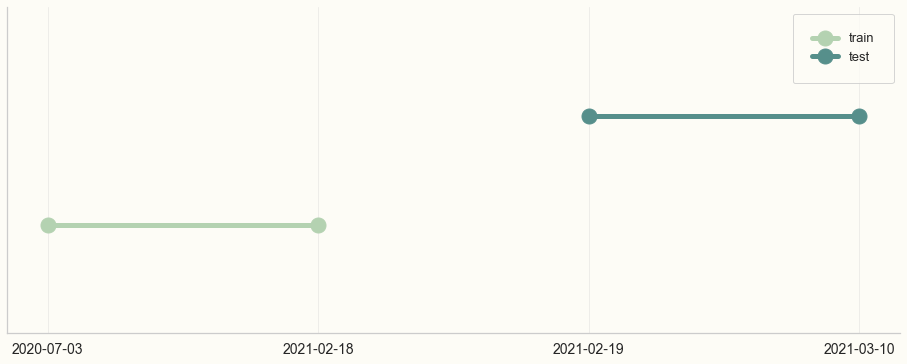

In [13]:
train_range = df_train.date.dt.strftime('%Y-%m-%d').agg(['min', 'max'])
test_range = df_test.date.dt.strftime('%Y-%m-%d').agg(['min', 'max'])


fig, ax = plt.subplots()
ax.plot(train_range, [0.2, 0.2], linewidth=5, marker='.', markersize=30, label='train')
ax.plot(test_range, [0.3, 0.3], linewidth=5, marker='.', markersize=30, label='test', color=colors[1])
ax.set_ylim(0.1, 0.4)
ax.legend()
ax.set_yticks(ticks=[]);
plt.xticks(fontsize=14)
ax.legend(borderpad=1.5, fontsize=13)

print('train', train_range, '\n', sep='\n')
print('test', test_range, sep='\n')

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pip install xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

Note: you may need to restart the kernel to use updated packages.


In [119]:


df.date = pd.to_datetime(df_train.copy().date)
df

,date,Station,Available,Charging,Passive,Other,tod,dow,trend,Latitude,Longitude,Postcode,area,dayofweek,hour,dayofmonth
0,2020-07-03 00:00:00,FR*V75*EBELI*1*1,3,0,0,0,0,6,27,48.855667,2.354089,75004,south,4,0,3
1,2020-07-03 00:00:00,FR*V75*EBELI*10*1,2,1,0,0,0,6,27,48.864240,2.397724,75020,east,4,0,3
2,2020-07-03 00:00:00,FR*V75*EBELI*11*1,2,1,0,0,0,6,27,48.861016,2.283080,75016,west,4,0,3
3,2020-07-03 00:00:00,FR*V75*EBELI*12*1,3,0,0,0,0,6,27,48.824388,2.336857,75014,south,4,0,3
4,2020-07-03 00:00:00,FR*V75*EBELI*13*1,3,0,0,0,0,6,27,48.882640,2.335728,75009,north,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851078,2021-02-18 23:45:00,FR*V75*EBELI*95*1,0,0,0,3,95,5,22202,48.868510,2.295469,75016,west,3,23,18
1851079,2021-02-18 23:45:00,FR*V75*EBELI*96*1,2,1,0,0,95,5,22202,48.835500,2.349650,75013,south,3,23,18
1851080,2021-02-18 23:45:00,FR*V75*EBELI*97*1,1,1,1,0,95,5,22202,48.839950,2.397822,75012,east,3,23,18
1851081,2021-02-18 23:45:00,FR*V75*EBELI*98*1,2,0,1,0,95,5,22202,48.849980,2.361920,75004,south,3,23,18


In [120]:
train_area = df.groupby(['date', 'area']).agg({'Available': 'sum',
                                                         'Charging': 'sum',
                                                          'Passive': 'sum',
                                                          'Other': 'sum',
                                                          'tod': 'max',
                                                          'dow': 'max',
                                                          'Latitude': 'mean',
                                                          'Longitude': 'mean',
                                                          'trend': 'max'}).reset_index()
test_area = df.groupby(['date', 'area']).agg({
    'tod': 'max',
    'dow': 'max',
    'Latitude': 'mean',
    'Longitude': 'mean',
    'trend': 'max'}).reset_index()



In [121]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.date.dt.hour
    df['dayofweek'] = df.date.dt.dayofweek
    #df['quarter'] = df.date.dt.quarter
    #df['dayofyear'] = df.date.dt.dayofyear
    df['dayofmonth'] = df.date.dt.day
    #df['weekofyear'] = df.date.dt.isocalendar().week
    return df

train_area1 = create_features(train_area)



In [122]:
train_area1

,date,area,Available,Charging,Passive,Other,tod,dow,Latitude,Longitude,trend,hour,dayofweek,dayofmonth
0,2020-07-03 00:00:00,east,55,5,6,9,0,6,48.865007,2.386981,27,0,4,3
1,2020-07-03 00:00:00,north,46,3,5,12,0,6,48.878152,2.327133,27,0,4,3
2,2020-07-03 00:00:00,south,48,3,3,9,0,6,48.838117,2.347826,27,0,4,3
3,2020-07-03 00:00:00,west,36,7,8,18,0,6,48.851192,2.294069,27,0,4,3
4,2020-07-03 00:15:00,east,57,6,3,9,1,6,48.865007,2.386981,28,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88499,2021-02-18 23:30:00,west,25,5,7,32,94,5,48.851190,2.294069,22201,23,3,18
88500,2021-02-18 23:45:00,east,37,5,2,31,95,5,48.865007,2.386981,22202,23,3,18
88501,2021-02-18 23:45:00,north,28,9,5,24,95,5,48.878152,2.327133,22202,23,3,18
88502,2021-02-18 23:45:00,south,39,5,4,15,95,5,48.838118,2.347826,22202,23,3,18


In [126]:
train = train_area1.loc[train_area1.date < '2021-02-1 00:00:00']
test  = train_area1.loc[train_area1.date >= '2021-02-1 00:00:00']
oneHot=["area","hour","dayofweek","dayofmonth"]
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train[oneHot])
train[enc.get_feature_names_out()]=enc.transform(train[oneHot]).toarray()
test[enc.get_feature_names_out()]=enc.transform(test[oneHot]).toarray()


from sklearn.preprocessing import StandardScaler
 
# create data
 
# compute required values
scaler = StandardScaler()
var_quant=["tod","dow","Latitude","Longitude","trend"]
sca = scaler.fit(train[var_quant])
train[var_quant] = sca.transform(train[var_quant])
train[var_quant] = sca.transform(test[var_quant])

 

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_11928\2200471938.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_11928\2200471938.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_11928\2200471938.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

ValueError: Length of values (6908) does not match length of index (81596)

In [100]:


FEATURES = ['tod','dow', 'trend', 'hour', 'dayofweek']+list(enc.get_feature_names_out()) +list(sca.get_feature_names_out)
TARGET = ['Available']

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]


In [101]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[15:46:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:38.42328	validation_1-rmse:33.03153
[100]	validation_0-rmse:14.86961	validation_1-rmse:13.17044
[200]	validation_0-rmse:7.12842	validation_1-rmse:6.69750
[300]	validation_0-rmse:5.15480	validation_1-rmse:5.88702
[342]	validation_0-rmse:4.91136	validation_1-rmse:5.94340


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

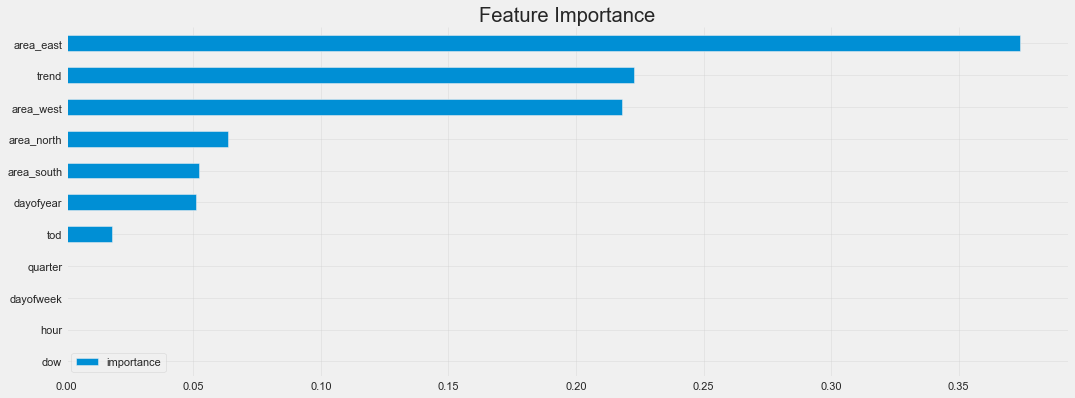

In [102]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [113]:
from sklearn.metrics import mean_absolute_error as MAE
print('sklearn MAE = ', MAE(y_test["Available"], y_test["pred"])/y_test["Available"].mean(),"%")

sklearn MAE =  0.14044481201144918 %


In [110]:
y_test["pred"]=reg.predict(X_test)
y_test

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_11928\1427729502.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Available,test,pred
81596,36,34.922512,34.922512
81597,38,33.302063,33.302063
81598,42,37.393238,37.393238
81599,28,26.591928,26.591928
81600,36,34.922512,34.922512
...,...,...,...
88499,25,26.361317,26.361317
88500,37,34.835606,34.835606
88501,28,33.215157,33.215157
88502,39,36.736088,36.736088
